In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

643

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d399e1209786f755b80a87a3662f434


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d399e1209786f755b80a87a3662f434&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nerchinskiy zavod
Processing Record 2 of Set 1 | aripuana
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | barinas
Processing Record 7 of Set 1 | derzhavinsk
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | dawei
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 1 | mananara
Processing Record 17 of Set 1 | pombas
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | ushtobe
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | caravelas
Processing Record 23 of Set 1 | nikolsk

City not found. Skipping...
Processing Record 38 of Set 4 | paracuru
Processing Record 39 of Set 4 | muros
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | raudeberg
Processing Record 43 of Set 4 | san carlos de bariloche
Processing Record 44 of Set 4 | bratsk
Processing Record 45 of Set 4 | puerto escondido
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | guasdualito
Processing Record 48 of Set 4 | murgab
Processing Record 49 of Set 4 | winnemucca
Processing Record 50 of Set 4 | santa isabel do rio negro
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | keti bandar
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | laureles
Processing Record 6 of Set 5 | vammala
Processing Record 7 of Set 5 | moorhead
Processing Record 8 of Set 5 | nanakuli
Processing Record 9 of Set 5 | shimoda
Processing Record 10 of Set 5 |

Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | imeni poliny osipenko
Processing Record 29 of Set 8 | salisbury
Processing Record 30 of Set 8 | salvador
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | jian
Processing Record 33 of Set 8 | vryburg
Processing Record 34 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 35 of Set 8 | kiama
Processing Record 36 of Set 8 | cetraro
Processing Record 37 of Set 8 | hutchinson
Processing Record 38 of Set 8 | baghdad
Processing Record 39 of Set 8 | erzin
Processing Record 40 of Set 8 | zhangjiakou
Processing Record 41 of Set 8 | kuching
Processing Record 42 of Set 8 | oistins
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | haines junction
Processing Record 45 of Set 8 | mitsamiouli
Processing Record 46 of Set 8 | fort saint james
Processing Record 47 of Set 8 | buin
Processing Record 48 of Set 8 | kulykivka
Processing Record 49 of Set 8 | vila franca do campo


City not found. Skipping...
Processing Record 10 of Set 12 | juelsminde
Processing Record 11 of Set 12 | bambanglipuro
Processing Record 12 of Set 12 | itaituba
Processing Record 13 of Set 12 | vicksburg
Processing Record 14 of Set 12 | huimilpan
Processing Record 15 of Set 12 | krasnoye-na-volge
Processing Record 16 of Set 12 | bowling green
Processing Record 17 of Set 12 | pingliang
Processing Record 18 of Set 12 | troitskoye
Processing Record 19 of Set 12 | silver city
Processing Record 20 of Set 12 | panama city
Processing Record 21 of Set 12 | visnes
Processing Record 22 of Set 12 | saint george
Processing Record 23 of Set 12 | azanka
Processing Record 24 of Set 12 | pacific grove
Processing Record 25 of Set 12 | shelburne
Processing Record 26 of Set 12 | sai buri
Processing Record 27 of Set 12 | krotoszyn
Processing Record 28 of Set 12 | stege
Processing Record 29 of Set 12 | aransas pass
Processing Record 30 of Set 12 | mandali
Processing Record 31 of Set 12 | luchegorsk
Process

In [15]:
len(cities)

643

In [16]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nerchinskiy Zavod,51.3088,119.6100,-26.52,100,43,1.70,RU,2022-01-31 23:22:39
1,Aripuana,-9.1667,-60.6333,72.18,97,100,1.86,BR,2022-01-31 23:22:39
2,Tasiilaq,65.6145,-37.6368,8.76,98,99,4.61,GL,2022-01-31 23:22:40
3,Hofn,64.2539,-15.2082,31.14,88,96,8.50,IS,2022-01-31 23:22:41
4,Barinas,8.6226,-70.2075,85.30,29,6,6.04,VE,2022-01-31 23:22:42
5,Derzhavinsk,51.1000,66.3167,19.49,94,100,16.58,KZ,2022-01-31 23:22:43
6,Butaritari,3.0707,172.7902,81.30,79,93,13.02,KI,2022-01-31 23:22:43
7,Port Alfred,-33.5906,26.8910,75.22,95,100,5.48,ZA,2022-01-31 23:22:44
8,Taltal,-25.4000,-70.4833,67.60,71,3,6.58,CL,2022-01-31 23:22:45
9,Grindavik,63.8424,-22.4338,39.67,87,40,26.46,IS,2022-01-31 23:22:45


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nerchinskiy Zavod,RU,2022-01-31 23:22:39,51.3088,119.6100,-26.52,100,43,1.70
1,Aripuana,BR,2022-01-31 23:22:39,-9.1667,-60.6333,72.18,97,100,1.86
2,Tasiilaq,GL,2022-01-31 23:22:40,65.6145,-37.6368,8.76,98,99,4.61
3,Hofn,IS,2022-01-31 23:22:41,64.2539,-15.2082,31.14,88,96,8.50
4,Barinas,VE,2022-01-31 23:22:42,8.6226,-70.2075,85.30,29,6,6.04
5,Derzhavinsk,KZ,2022-01-31 23:22:43,51.1000,66.3167,19.49,94,100,16.58
6,Butaritari,KI,2022-01-31 23:22:43,3.0707,172.7902,81.30,79,93,13.02
7,Port Alfred,ZA,2022-01-31 23:22:44,-33.5906,26.8910,75.22,95,100,5.48
8,Taltal,CL,2022-01-31 23:22:45,-25.4000,-70.4833,67.60,71,3,6.58
9,Grindavik,IS,2022-01-31 23:22:45,63.8424,-22.4338,39.67,87,40,26.46


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643672953.9749844

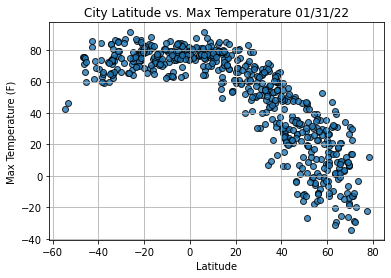

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

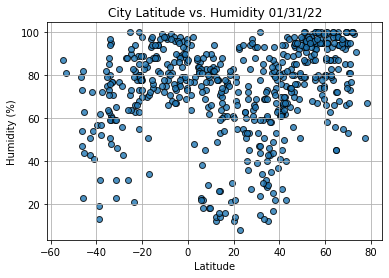

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

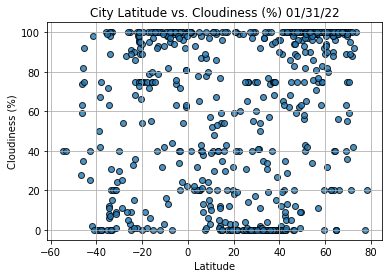

In [23]:
# Build the scatterplots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1,marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                     Mananara
Country                        MG
Date          2022-01-31 23:22:48
Lat                      -16.1667
Lng                       49.7667
Max Temp                    74.34
Humidity                       93
Cloudiness                     55
Wind Speed                   5.95
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
581    False
582     True
583     True
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

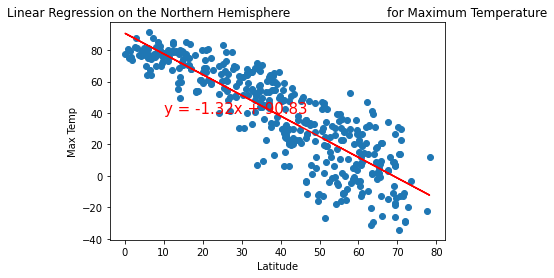

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

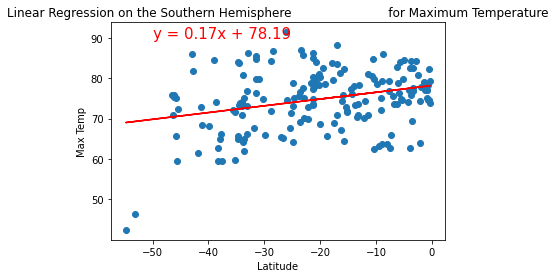

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

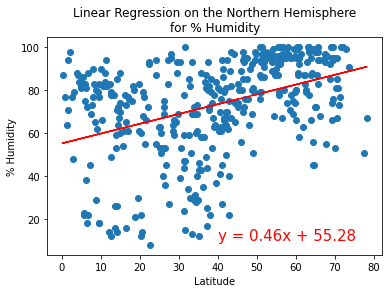

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

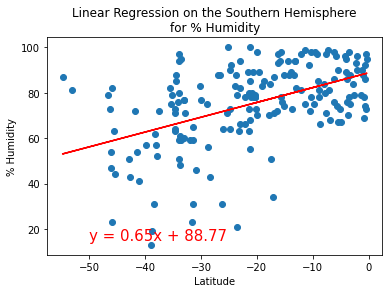

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

In [59]:
northern_hemi_df.describe()["Cloudiness"]


count    404.000000
mean      55.995050
std       40.603022
min        0.000000
25%       12.000000
50%       65.000000
75%       99.000000
max      100.000000
Name: Cloudiness, dtype: float64

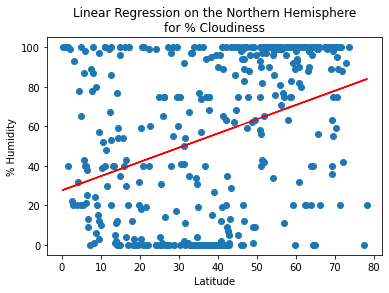

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Humidity',(-50,60))

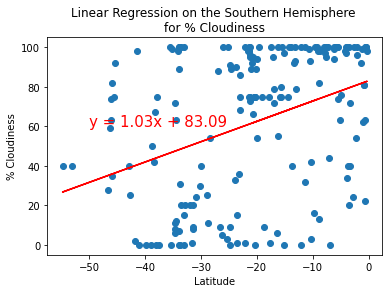

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

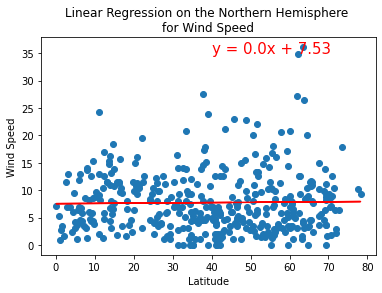

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

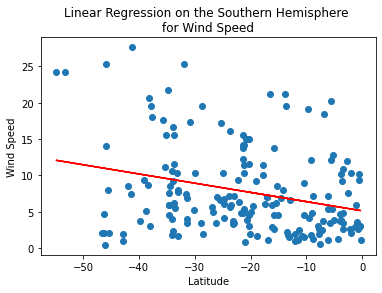

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))